In [15]:
try:
    import pandas as pd
except:
    import sys
    !pip install --yes --prefix {sys.prefix} pandas
    import pandas as pd


df = pd.read_csv("global air pollution dataset.csv")


def convert_category_to_numeric(category):
    mapping = {
        'Good': 5,
        'Moderate': 4,
        'Unhealthy for Sensitive Groups': 3,
        'Unhealthy': 2,
        'Very Unhealthy': 1,
        'Hazardous': 0
    }
    # Returns -1 for categories not in mapping
    return mapping.get(category, -1)

# Convert all AQI categories to numerical values
category_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category',
                    'NO2 AQI Category', 'PM2.5 AQI Category']

for col in category_columns:
    df[col] = df[col].apply(convert_category_to_numeric)


df.to_csv('cleaned_dataset.csv', index=False)
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,4,1,5,36,5,0,5,51,4
1,Brazil,Presidente Dutra,41,5,1,5,5,5,1,5,41,5
2,Italy,Priolo Gargallo,66,4,1,5,39,5,2,5,66,4
3,Poland,Przasnysz,34,5,1,5,34,5,0,5,20,5
4,France,Punaauia,22,5,0,5,22,5,0,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,2,3,5,154,2,2,5,184,2
23459,France,Sceaux,50,5,1,5,20,5,5,5,50,5
23460,India,Mormugao,50,5,1,5,22,5,1,5,50,5
23461,United States of America,Westerville,71,4,1,5,44,5,2,5,71,4


In [16]:
most_polluted = ['Bangladesh','Chad','Pakistan','Tajikstan','India']
least_polluted = ['Australia','Estonia','Finland','Grenada','Iceland','New Zealand']

condition_most = df['Country'].isin(most_polluted)
df_most = df[condition_most]
df_most.to_csv('most_polluted_countries.csv', index=False)
df_most


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
12,India,Radaur,158,2,3,5,139,3,1,5,158,2
13,Pakistan,Radhan,158,2,1,5,50,5,1,5,158,2
16,India,Rajgir,154,2,3,5,100,3,2,5,154,2
19,India,Phulabani,161,2,2,5,71,4,0,5,161,2
21,India,Pimpri,118,3,2,5,30,5,2,5,118,3
...,...,...,...,...,...,...,...,...,...,...,...,...
23430,Bangladesh,Bheramara,86,4,3,5,86,4,2,5,82,4
23452,Pakistan,Havelian,124,3,1,5,124,3,0,5,85,4
23454,India,Konnur,86,4,0,5,23,5,0,5,86,4
23458,India,Gursahaiganj,184,2,3,5,154,2,2,5,184,2


In [4]:
condition_least = df['Country'].isin(least_polluted)
df_least = df[condition_least]
df_least.to_csv('least_polluted_countries.csv', index=False)
df_least

,Country,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
33,Finland,30,5,1,5,30,5,1,5,15,5
84,New Zealand,19,5,0,5,19,5,1,5,17,5
116,Finland,29,5,1,5,29,5,1,5,7,5
173,Australia,29,5,0,5,29,5,0,5,13,5
460,Finland,34,5,1,5,34,5,1,5,17,5
...,...,...,...,...,...,...,...,...,...,...,...
22262,Estonia,35,5,1,5,35,5,0,5,17,5
22268,Estonia,35,5,1,5,35,5,0,5,19,5
22510,New Zealand,13,5,0,5,13,5,2,5,11,5
23082,Finland,36,5,1,5,36,5,0,5,5,5


In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import files



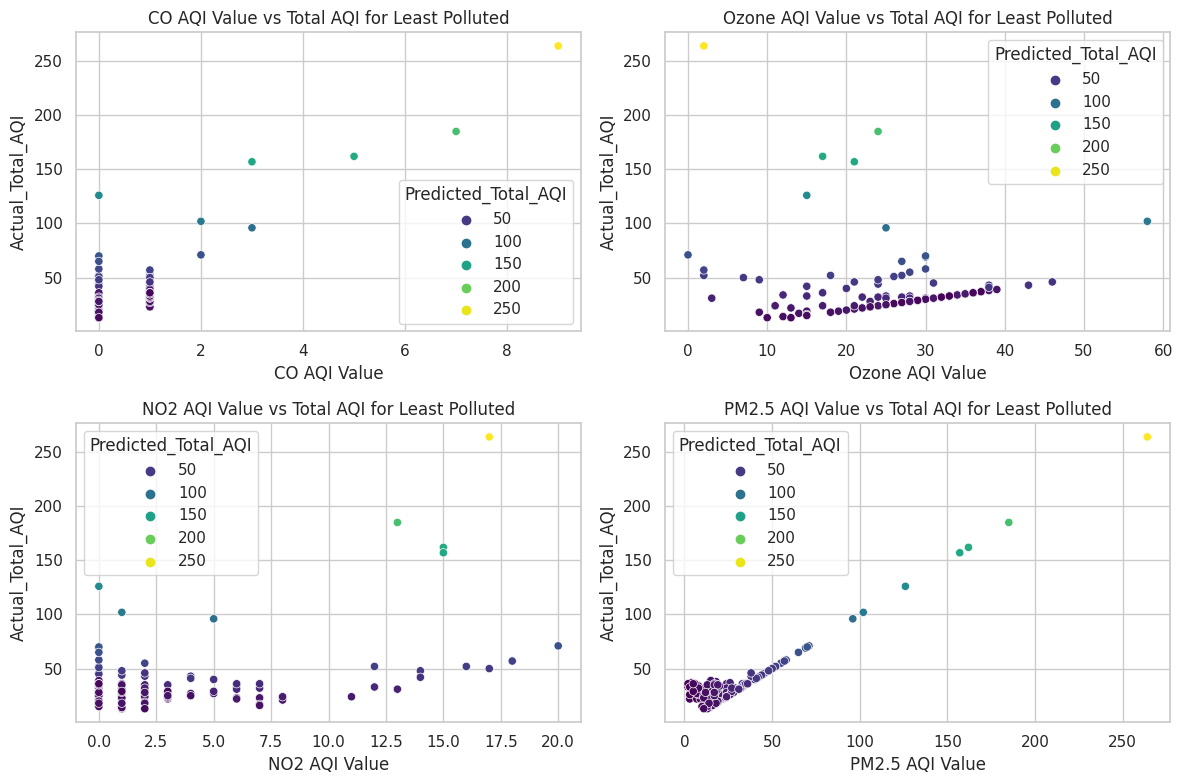

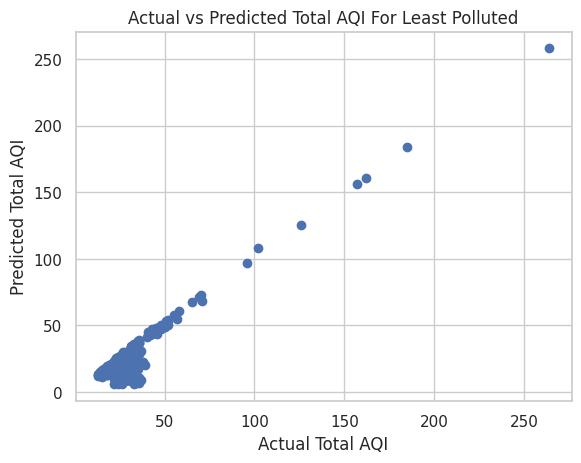

Predictions for Least Polluted Countries:
     CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0               1               30              1               15   
1               0               19              1               17   
2               1               29              1                7   
3               0               29              0               13   
4               1               34              1               17   
..            ...              ...            ...              ...   
198             1               35              0               17   
199             1               35              0               19   
200             0               13              2               11   
201             1               36              0                5   
202             0               28              2               17   

     Actual_Total_AQI  Predicted_Total_AQI  
0                  30            18.679163  
1                  19      

In [14]:
new_data = pd.read_csv('least_polluted_countries.csv')
X_new = new_data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y_new = new_data['AQI Value']

predictions_new = model.predict(X_new)

df_new = pd.DataFrame({
    'CO AQI Value': X_new['CO AQI Value'],
    'Ozone AQI Value': X_new['Ozone AQI Value'],
    'NO2 AQI Value': X_new['NO2 AQI Value'],
    'PM2.5 AQI Value': X_new['PM2.5 AQI Value'],
    'Actual_Total_AQI': y_new,
    'Predicted_Total_AQI': predictions_new
})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, feature in enumerate(X_new.columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y='Actual_Total_AQI', hue='Predicted_Total_AQI', data=df_new, palette='viridis')
    plt.title(f'{feature} vs Total AQI for Least Polluted')

plt.tight_layout()
plt.show()

plt.scatter(y_new, predictions_new)
plt.xlabel('Actual Total AQI')
plt.ylabel('Predicted Total AQI')
plt.title('Actual vs Predicted Total AQI For Least Polluted')
plt.show()

print("Predictions for Least Polluted Countries:")
print(df_new)


In [ ]:
least_coefficients_df = pd.DataFrame({'Feature': X_new.columns, 'Coefficient': model.coef_})
print(least_coefficients_df)

           Feature  Coefficient
0     CO AQI Value    -0.035975
1  Ozone AQI Value     0.155348
2    NO2 AQI Value    -0.025643
3  PM2.5 AQI Value     0.981651


In [ ]:
X_and_y_values = df_new[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'Actual_Total_AQI']]
correlation_matrix = X_and_y_values.corr()
print("Correlation Coefficients:")
print(correlation_matrix)
correlation_with_target = correlation_matrix['Actual_Total_AQI'].drop('Actual_Total_AQI')
print("\nCorrelation with Actual_Total_AQI:")
print(correlation_with_target)

Correlation Coefficients:
                  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
CO AQI Value          1.000000         0.057935       0.421873   
Ozone AQI Value       0.057935         1.000000      -0.563261   
NO2 AQI Value         0.421873        -0.563261       1.000000   
PM2.5 AQI Value       0.704943        -0.246887       0.551940   
Actual_Total_AQI      0.813137        -0.068722       0.472925   

                  PM2.5 AQI Value  Actual_Total_AQI  
CO AQI Value             0.704943          0.813137  
Ozone AQI Value         -0.246887         -0.068722  
NO2 AQI Value            0.551940          0.472925  
PM2.5 AQI Value          1.000000          0.942906  
Actual_Total_AQI         0.942906          1.000000  

Correlation with Actual_Total_AQI:
CO AQI Value       0.813137
Ozone AQI Value   -0.068722
NO2 AQI Value      0.472925
PM2.5 AQI Value    0.942906
Name: Actual_Total_AQI, dtype: float64


In [ ]:
mse_new = mean_squared_error(df_new['Actual_Total_AQI'], df_new['Predicted_Total_AQI'])
print(f'Mean Squared Error on New Data: {mse_new}')

Mean Squared Error on New Data: 141.16596678387648


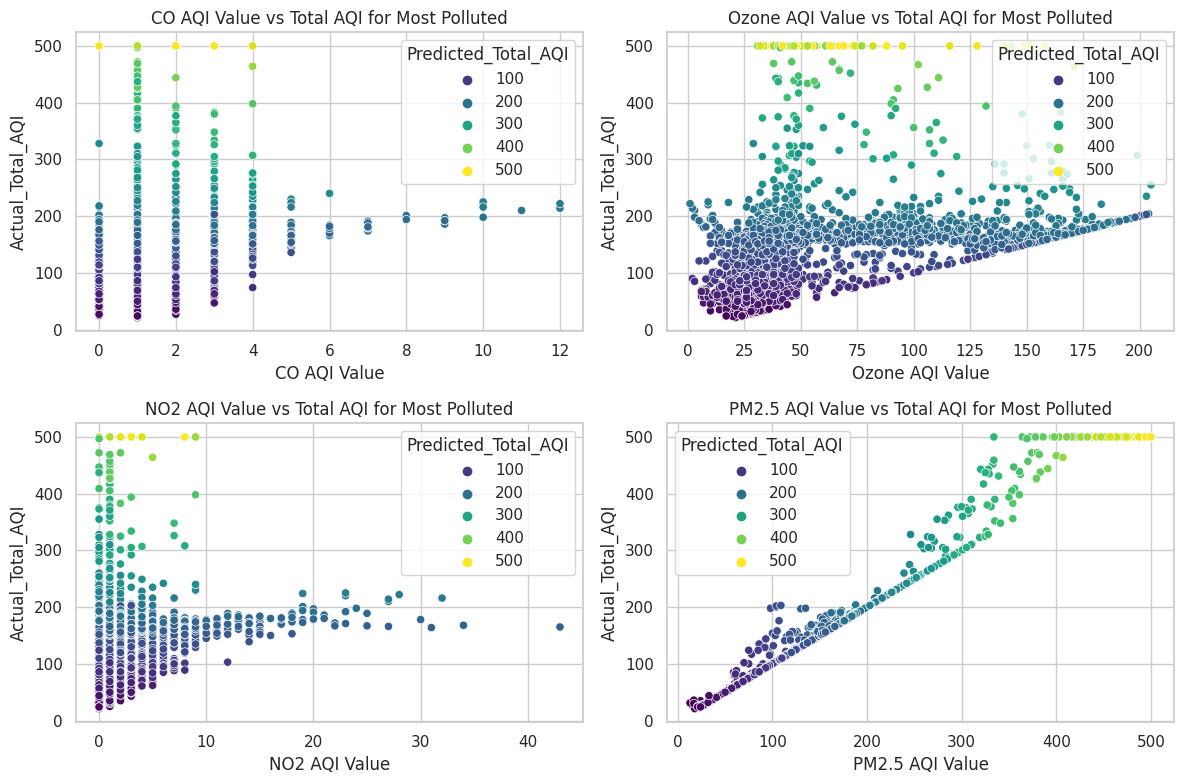

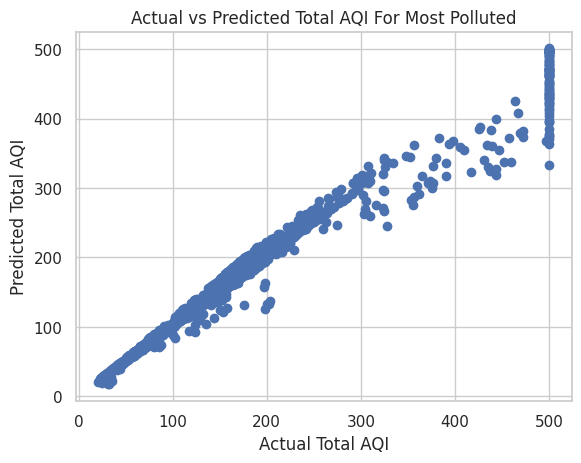

Predictions for Most Polluted Countries:
      CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0                3              139              1              158   
1                1               50              1              158   
2                3              100              2              154   
3                2               71              0              161   
4                2               30              2              118   
...            ...              ...            ...              ...   
2903             3               86              2               82   
2904             1              124              0               85   
2905             0               23              0               86   
2906             3              154              2              184   
2907             1               22              1               50   

      Actual_Total_AQI  Predicted_Total_AQI  
0                  158           175.916203  
1             

In [12]:
most_data = pd.read_csv('most_polluted_countries.csv')
X_most = most_data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y_most = most_data['AQI Value']

predictions_most = model.predict(X_most)

df_most = pd.DataFrame({
    'CO AQI Value': X_most['CO AQI Value'],
    'Ozone AQI Value': X_most['Ozone AQI Value'],
    'NO2 AQI Value': X_most['NO2 AQI Value'],
    'PM2.5 AQI Value': X_most['PM2.5 AQI Value'],
    'Actual_Total_AQI': y_most,
    'Predicted_Total_AQI': predictions_most
})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, feature in enumerate(X_most.columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y='Actual_Total_AQI', hue='Predicted_Total_AQI', data=df_most, palette='viridis')
    plt.title(f'{feature} vs Total AQI for Most Polluted')

plt.tight_layout()
plt.show()

plt.scatter(y_most, predictions_most)
plt.xlabel('Actual Total AQI')
plt.ylabel('Predicted Total AQI')
plt.title('Actual vs Predicted Total AQI For Most Polluted')
plt.show()

print("Predictions for Most Polluted Countries:")
print(df_most)

most_coefficients_df = pd.DataFrame({'Feature': X_most.columns, 'Coefficient': model.coef_})
print(most_coefficients_df)

In [ ]:
X_and_y_values = df_most[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'Actual_Total_AQI']]
correlation_matrix = X_and_y_values.corr()
print("Correlation Coefficients:")
print(correlation_matrix)
correlation_with_target = correlation_matrix['Actual_Total_AQI'].drop('Actual_Total_AQI')
print("\nCorrelation with Actual_Total_AQI:")
print(correlation_with_target)

Correlation Coefficients:
                  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
CO AQI Value          1.000000         0.442475       0.716365   
Ozone AQI Value       0.442475         1.000000      -0.086265   
NO2 AQI Value         0.716365        -0.086265       1.000000   
PM2.5 AQI Value       0.166627         0.270986       0.093010   
Actual_Total_AQI      0.146156         0.269846       0.074218   

                  PM2.5 AQI Value  Actual_Total_AQI  
CO AQI Value             0.166627          0.146156  
Ozone AQI Value          0.270986          0.269846  
NO2 AQI Value            0.093010          0.074218  
PM2.5 AQI Value          1.000000          0.988887  
Actual_Total_AQI         0.988887          1.000000  

Correlation with Actual_Total_AQI:
CO AQI Value       0.146156
Ozone AQI Value    0.269846
NO2 AQI Value      0.074218
PM2.5 AQI Value    0.988887
Name: Actual_Total_AQI, dtype: float64


In [ ]:


mse_most = mean_squared_error(df_most['Actual_Total_AQI'], df_most['Predicted_Total_AQI'])
print(f'Mean Squared Error on New Data: {mse_most}')

from sklearn.metrics import r2_score

r2 = r2_score(df_new['Actual_Total_AQI'], df_new['Predicted_Total_AQI'])
print(r2)

Mean Squared Error on New Data: 269.73688283947934
0.8021436759669255
